<a href="https://colab.research.google.com/github/clockingoffbye/PCVK_Ganjil_2025/blob/main/Modul3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementasi Image Inverse

Mounted at /content/drive
Isi MyDrive:
['Presentation1.pptx', 'Kelompok 3.pptx', 'IMG20200812121233.jpg', 'Resume (1).gdoc', 'Resume.gdoc', 'Classroom', 'Dirhamawan Putranto _ Project Charter Laporan Akhir D2 2023 (1).pdf', 'Dirhamawan Putranto _ Project Charter Laporan Akhir D2 2023.pdf', 'appdata', 'TI-2E_Kelompok3_Laporan Project Berita Basdat.docx', 'SEMESTER 3', 'TI-2E_Kelompok3_Manual Web.docx', 'TI-2E_Laporan Akhir PBL_Sistem Pencatatan Prestasi.pdf', '08_Dirhamawan Putranto_Kuis 2 ADBO.drawio.png', 'Untitled spreadsheet.gsheet', 'Colab Notebooks', 'Semester 4', '08_Dirhawan Putranto.pdf', 'PRESMA DB.drawio', 'Dirhamawan Putranto_SIC_Python.gdoc', 'Dirhamawan Putranto_SIC_AI, Prompting, and Productivity Hacks.gdoc', 'Dirhamawan Putranto_SIC_GROW FRAMEWORK.gdoc', 'PCV_Wk1_Images']
Transformasi Image Inverse


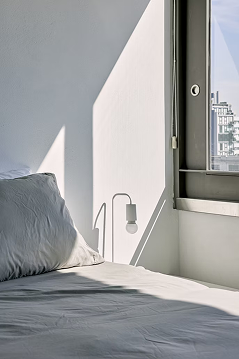

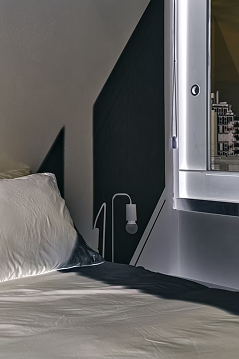

In [3]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np

from google.colab import drive
drive.mount('/content/drive')

import os

# Cek root Drive
drive_root = '/content/drive/MyDrive'
print("Isi MyDrive:")
print(os.listdir(drive_root))

# Load gambar asli
img_path = '/content/drive/MyDrive/PCV_Wk1_Images/lena.png'  # ganti sesuai file
original = cv2.imread(img_path)

if original is None:
    print("Gagal membaca gambar, cek path!")
else:
    # Inverse pakai formula 255 - pixel
    inverse = 255 - original

    print("Transformasi Image Inverse")
    cv2_imshow(original)
    cv2_imshow(inverse)


Implementasi Contrast Transformation

Transformasi Contrast
Masukkan nilai contrast (misal: 50-200): 100


/tmp/ipython-input-3532590382.py:18: RuntimeWarning: overflow encountered in scalar subtract
  red_new = factor * (red - 128) + 128
/tmp/ipython-input-3532590382.py:19: RuntimeWarning: overflow encountered in scalar subtract
  green_new = factor * (green - 128) + 128
/tmp/ipython-input-3532590382.py:20: RuntimeWarning: overflow encountered in scalar subtract
  blue_new = factor * (blue - 128) + 128


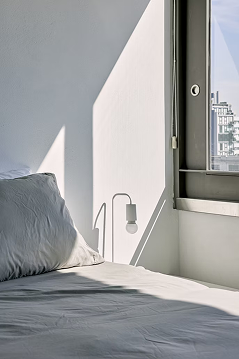

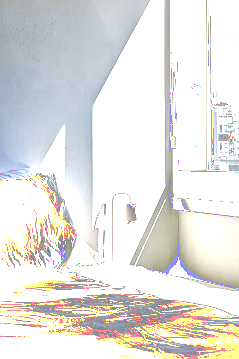

In [4]:
# Asumsikan 'original' sudah ada
contrast_img = original.copy()

print("Transformasi Contrast")
try:
    contrast = int(input("Masukkan nilai contrast (misal: 50-200): "))
except:
    contrast = 125  # Default normal

factor = (259 * (contrast + 255)) / (255 * (259 - contrast))

for i in range(contrast_img.shape[0]):
    for j in range(contrast_img.shape[1]):
        red = original[i, j, 0]
        green = original[i, j, 1]
        blue = original[i, j, 2]

        red_new = factor * (red - 128) + 128
        green_new = factor * (green - 128) + 128
        blue_new = factor * (blue - 128) + 128

        # Truncate
        contrast_img[i, j, 0] = np.clip(red_new, 0, 255).astype(np.uint8)
        contrast_img[i, j, 1] = np.clip(green_new, 0, 255).astype(np.uint8)
        contrast_img[i, j, 2] = np.clip(blue_new, 0, 255).astype(np.uint8)

cv2_imshow(original)
cv2_imshow(contrast_img)

Implementasi Logarithmic Brightness Transformation

Transformasi Logarithmic Brightness


/tmp/ipython-input-1916104717.py:6: RuntimeWarning: overflow encountered in scalar add
  c = 255 / np.log(1 + max_val)
/tmp/ipython-input-1916104717.py:6: RuntimeWarning: divide by zero encountered in log
  c = 255 / np.log(1 + max_val)
/tmp/ipython-input-1916104717.py:12: RuntimeWarning: overflow encountered in scalar add
  s = c * np.log(1 + r)
/tmp/ipython-input-1916104717.py:12: RuntimeWarning: divide by zero encountered in log
  s = c * np.log(1 + r)
/tmp/ipython-input-1916104717.py:12: RuntimeWarning: invalid value encountered in scalar multiply
  s = c * np.log(1 + r)
/tmp/ipython-input-1916104717.py:13: RuntimeWarning: invalid value encountered in cast
  log_img[i, j, k] = np.clip(s, 0, 255).astype(np.uint8)


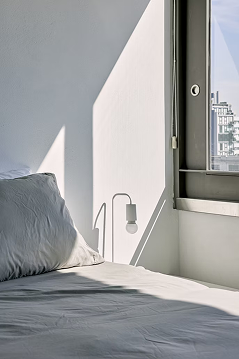

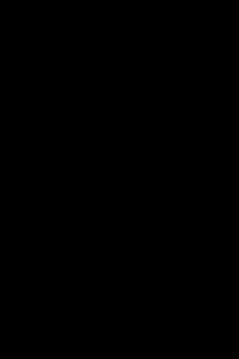

In [5]:
# Asumsikan 'original' sudah ada
log_img = original.copy()

print("Transformasi Logarithmic Brightness")
max_val = np.max(original)
c = 255 / np.log(1 + max_val)

for i in range(log_img.shape[0]):
    for j in range(log_img.shape[1]):
        for k in range(log_img.shape[2]):
            r = original[i, j, k]
            s = c * np.log(1 + r)
            log_img[i, j, k] = np.clip(s, 0, 255).astype(np.uint8)

cv2_imshow(original)
cv2_imshow(log_img)

Implementasi Grayscale Transformation

/tmp/ipython-input-3227131595.py:7: RuntimeWarning: overflow encountered in scalar add
  gray_val = (original[i, j, 0] + original[i, j, 1] + original[i, j, 2]) // 3


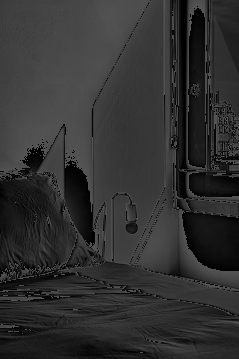

/tmp/ipython-input-3227131595.py:19: RuntimeWarning: overflow encountered in scalar add
  gray_val = (max_rgb + min_rgb) // 2


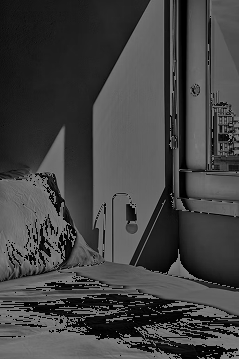

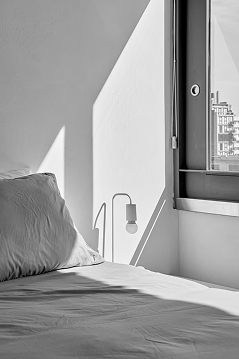

In [6]:
# Asumsikan 'original' sudah ada (pastikan shape[2]==3 untuk RGB)

# a. Averaging
gray_avg = np.zeros_like(original)
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        gray_val = (original[i, j, 0] + original[i, j, 1] + original[i, j, 2]) // 3
        gray_avg[i, j] = [gray_val, gray_val, gray_val]

cv2_imshow(gray_avg)

# b. Lightness
gray_light = np.zeros_like(original)
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        r, g, b = original[i, j]
        max_rgb = max(r, g, b)
        min_rgb = min(r, g, b)
        gray_val = (max_rgb + min_rgb) // 2
        gray_light[i, j] = [gray_val, gray_val, gray_val]

cv2_imshow(gray_light)

# c. Luminance
gray_lum = np.zeros_like(original)
for i in range(original.shape[0]):
    for j in range(original.shape[1]):
        r, g, b = original[i, j]
        gray_val = int(0.21 * r + 0.72 * g + 0.07 * b)
        gray_lum[i, j] = [gray_val, gray_val, gray_val]

cv2_imshow(gray_lum)

Show Certain Colors (Contoh: Keep Blue, Grayscale Others)

Selective Color: Keep Blue, Grayscale Others


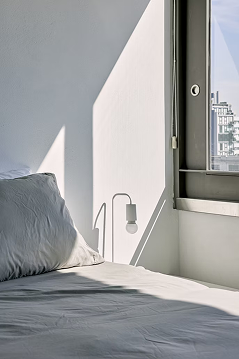

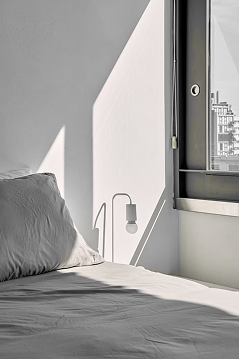

In [7]:
# Asumsikan 'original' sudah ada
selective = original.copy()

print("Selective Color: Keep Blue, Grayscale Others")
blue_threshold = 100  # Adjust jika perlu

for i in range(selective.shape[0]):
    for j in range(selective.shape[1]):
        r, g, b = original[i, j]
        # Cek apakah dominan biru
        if b > r and b > g and b > blue_threshold:
            # Keep original
            selective[i, j] = [r, g, b]
        else:
            # Grayscale menggunakan luminance
            gray_val = int(0.21 * r + 0.72 * g + 0.07 * b)
            selective[i, j] = [gray_val, gray_val, gray_val]

cv2_imshow(original)
cv2_imshow(selective)